In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\Owen\Documents\Personal Projects\NBA_2023_24_shot_data.xlsx')

In [3]:
df

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
0,A.J. Lawson,DAL,23,38,53,71.7,1,15,6.7,2,...,23.5,4,15,26.7,8,32,25,5,18,27.8
1,AJ Green,MIL,24,6,7,85.7,0,4,0,8,...,50,6,15,40,18,39,46.2,51,130,39.2
2,AJ Griffin,ATL,20,3,5,60,3,12,25,2,...,16.7,1,3,33.3,2,9,22.2,8,30,26.7
3,Aaron Gordon,DEN,28,328,463,70.8,19,78,24.4,11,...,24.1,13,27,48.1,20,56,35.7,20,81,24.7
4,Aaron Holiday,HOU,27,46,71,64.8,33,84,39.3,23,...,38.9,16,31,51.6,23,49,46.9,61,167,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,CHI,29,69,115,60,12,29,41.4,30,...,52.9,5,14,35.7,14,31,45.2,45,138,32.6
568,Zavier Simpson,DET,27,6,14,42.9,3,16,18.8,3,...,0,0,1,0,0,2,0,5,15,33.3
569,Zeke Nnaji,DEN,23,58,106,54.7,5,15,33.3,0,...,0,2,6,33.3,2,9,22.2,4,14,28.6
570,Ziaire Williams,MEM,22,66,99,66.7,11,46,23.9,15,...,27.8,17,41,41.5,27,77,35.1,31,110,28.2


In [4]:
df.dtypes

# df.sort_values('Rest_Area_FG%', ascending=True)
# I can't do this right now, the data types were imported as objects
# I want to change the datatypes, but first I have to get rid of incomplete rows.

Player                 object
Team                   object
Age                    object
Rest_Area_FGM          object
Rest_Area_FGA          object
Rest_Area_FG%          object
Paint_FGM              object
Paint_FGA              object
Paint_FG%              object
Mid_FGM                object
Mid_FGA                object
Mid_FG%                object
L_Corner_3_FGM         object
L_Corner_3_FGA         object
L_Corner_3_FG%         object
R_Corner_3_FGM         object
R_Corner_3_FGA         object
R_Corner_3_FG%         object
Total_Corner_3_FGM     object
Total_Corner_3_FGA     object
Total_Corner_3_FG%     object
Above_Break_3_FGM       int64
Above_Break_3_FGA       int64
Above_Break_3_FG%     float64
dtype: object

In [5]:
# Let's Identify those rows
df.loc[df['Mid_FGM'] == '-']

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
262,Javonte Smart,PHI,25,-,-,-,0,0,0,-,...,-,0,0,0,0,0,0,0,0,0.0
380,Malcolm Cazalon,DET,22,0,0,0,0,0,0,-,...,-,-,-,-,-,-,-,0,0,0.0


Clearly this was an issue in data collection, or there is some independent reason these two players have incomplete data. I would normally want to include these players in any sort of table like this, but the information is not easily available. These two specific players played 1 and 2 games respectively in 2023-24, and as the end collection will have a shot minimum and these players will be omitted, I can remove their rows now.

In [7]:
df = df[df['Rest_Area_FGM'] != '-']

In [8]:
#Check them again
df.loc[df['Rest_Area_FGM'] == '-']

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%


In [9]:
df[df['Age'] == ' m ']

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
312,Julian Champagnie,SAS,m,54,86,62.8,7,30,23.3,2,...,38.8,14,44,31.8,33,93,35.5,68,184,37.0


In [10]:
df.loc[df['Age'] == ' m ', 'Age'] = 23

In [11]:
df = df.convert_dtypes()
df.dtypes

Player                string[python]
Team                  string[python]
Age                            Int64
Rest_Area_FGM                  Int64
Rest_Area_FGA                  Int64
Rest_Area_FG%                Float64
Paint_FGM                      Int64
Paint_FGA                      Int64
Paint_FG%                    Float64
Mid_FGM                       object
Mid_FGA                       object
Mid_FG%                       object
L_Corner_3_FGM                object
L_Corner_3_FGA                object
L_Corner_3_FG%                object
R_Corner_3_FGM                object
R_Corner_3_FGA                object
R_Corner_3_FG%                object
Total_Corner_3_FGM            object
Total_Corner_3_FGA            object
Total_Corner_3_FG%            object
Above_Break_3_FGM              Int64
Above_Break_3_FGA              Int64
Above_Break_3_FG%            Float64
dtype: object

In [12]:
#df['Mid_FGM'] = pd.to_numeric(df['Mid_FGM'])
#df = df[df['Rest_Area_FGM'] != '-']
df.loc[df['Mid_FGM'] == '-']

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
380,Malcolm Cazalon,DET,22,0,0,0.0,0,0,0.0,-,...,-,-,-,-,-,-,-,0,0,0.0


In [13]:
df = df[df['Mid_FGM'] != '-']
df.loc[df['Mid_FGM'] == '-']
df['Mid_FGM'] = pd.to_numeric(df['Mid_FGM'])


In [14]:
# Now let's do that for every row

In [15]:
for col in ['L_Corner_3_FGM', 'R_Corner_3_FGM', 'Total_Corner_3_FGM']:
    df = df[df[col] != '-']

df = df.convert_dtypes()
df.dtypes

Player                string[python]
Team                  string[python]
Age                            Int64
Rest_Area_FGM                  Int64
Rest_Area_FGA                  Int64
Rest_Area_FG%                Float64
Paint_FGM                      Int64
Paint_FGA                      Int64
Paint_FG%                    Float64
Mid_FGM                        Int64
Mid_FGA                        Int64
Mid_FG%                      Float64
L_Corner_3_FGM                 Int64
L_Corner_3_FGA                 Int64
L_Corner_3_FG%               Float64
R_Corner_3_FGM                 Int64
R_Corner_3_FGA                 Int64
R_Corner_3_FG%               Float64
Total_Corner_3_FGM             Int64
Total_Corner_3_FGA             Int64
Total_Corner_3_FG%           Float64
Above_Break_3_FGM              Int64
Above_Break_3_FGA              Int64
Above_Break_3_FG%            Float64
dtype: object

In [16]:
#Now all the rows are the types we want!

In [17]:
df.sort_values('Rest_Area_FG%', ascending=False)

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
103,D.J. Wilson,ORL,28,2,2,100.0,0,2,0.0,0,...,0.0,1,1,100.0,1,1,100.0,1,1,100.0
163,Dylan Windler,ATL,27,2,2,100.0,0,1,0.0,0,...,50.0,2,6,33.3,5,12,41.7,8,15,53.3
264,Jay Huff,DEN,26,4,4,100.0,2,2,100.0,0,...,0.0,0,0,0.0,0,0,0.0,3,9,33.3
241,Jalen Slawson,SAC,24,3,3,100.0,1,1,100.0,0,...,0.0,0,0,0.0,0,0,0.0,0,2,0.0
240,Jalen Pickett,DEN,24,1,1,100.0,2,3,66.7,3,...,0.0,0,1,0.0,0,1,0.0,9,23,39.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Mason Jones,SAC,25,0,0,0.0,0,0,0.0,0,...,0.0,0,0,0.0,0,1,0.0,2,6,33.3
234,Jalen Crutcher,NOP,24,0,0,0.0,0,1,0.0,0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
7,Adam Flagler,OKC,24,0,0,0.0,0,1,0.0,0,...,0.0,0,0,0.0,0,0,0.0,1,6,16.7
77,Charlie Brown Jr.,NYK,27,0,1,0.0,0,2,0.0,0,...,0.0,1,2,50.0,1,2,50.0,1,5,20.0


This almost does what I want, but players who shot only one shot and made it in the restricted area will be first. I want to filter out players who shot less than 50 shots

In [19]:
df[df['Rest_Area_FGA'] >= 50].sort_values(by='Rest_Area_FG%', ascending=False)


,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
138,Dereck Lively II,DAL,20,197,245,80.4,23,47,48.9,1,...,0.0,0,1,0.0,0,2,0.0,0,0,0.0
263,Jaxson Hayes,LAL,24,110,137,80.3,15,27,55.6,1,...,0.0,0,1,0.0,0,1,0.0,0,6,0.0
254,Jared Butler,WAS,23,49,62,79.0,20,49,40.8,5,...,62.5,2,5,40.0,7,13,53.8,17,62,27.4
110,Daniel Gafford,DAL,25,298,378,78.8,44,92,47.8,6,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
440,Obi Toppin,IND,26,203,260,78.1,23,54,42.6,4,...,43.1,12,32,37.5,43,104,41.3,59,146,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,De'Anthony Melton,PHI,26,43,87,49.4,12,38,31.6,7,...,36.4,5,19,26.3,13,41,31.7,64,173,37.0
174,Fred VanVleet,HOU,30,62,128,48.4,53,127,41.7,81,...,53.6,12,27,44.4,27,55,49.1,200,523,38.2
495,Scoot Henderson,POR,20,107,226,47.3,64,169,37.9,49,...,35.0,4,14,28.6,11,34,32.4,76,230,33.0
72,Cameron Payne,PHI,29,39,85,45.9,46,87,52.9,19,...,16.7,7,24,29.2,9,36,25.0,95,230,41.3


We can see here that Dereck Lively II was the player who shot the highest field goal percentage from the Restricted Area out of players with a minimum of 50 attempts from that zone. Pretty impressive for a rookie!

In [21]:
#We can do the same for each zone!

In [22]:
df[df['Paint_FGA'] >= 100].sort_values(by='Paint_FG%', ascending=False)

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
212,Ivica Zubac,LAC,27,212,317,66.9,124,198,62.6,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
434,Nikola Jokić,DEN,29,335,477,70.2,330,535,61.7,74,...,40.0,0,3,0.0,2,8,25.0,81,215,37.7
324,Kawhi Leonard,LAC,33,180,244,73.8,179,317,56.5,111,...,42.1,14,31,45.2,30,69,43.5,110,267,41.2
372,Luka Dončić,DAL,25,202,266,75.9,185,338,54.7,133,...,26.7,3,11,27.3,7,26,26.9,277,713,38.8
325,Keegan Murray,SAC,23,124,176,70.5,82,153,53.6,54,...,36.7,13,55,23.6,42,134,31.3,141,376,37.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Jeremy Sochan,SAS,21,193,316,61.1,63,181,34.8,14,...,35.1,11,38,28.9,24,75,32.0,46,148,31.1
73,Caris LeVert,CLE,29,145,249,58.2,65,187,34.8,27,...,32.6,8,25,32.0,22,68,32.4,86,262,32.8
271,Jerami Grant,POR,30,144,250,57.6,61,183,33.3,67,...,39.6,26,49,53.1,47,102,46.1,64,174,36.8
236,Jalen Green,HOU,22,237,384,61.7,52,159,32.7,73,...,41.4,10,29,34.5,22,58,37.9,179,544,32.9


In [23]:
# Let's try visualizing the top Paint players (Paint means everything inside free throw area - restricted area)

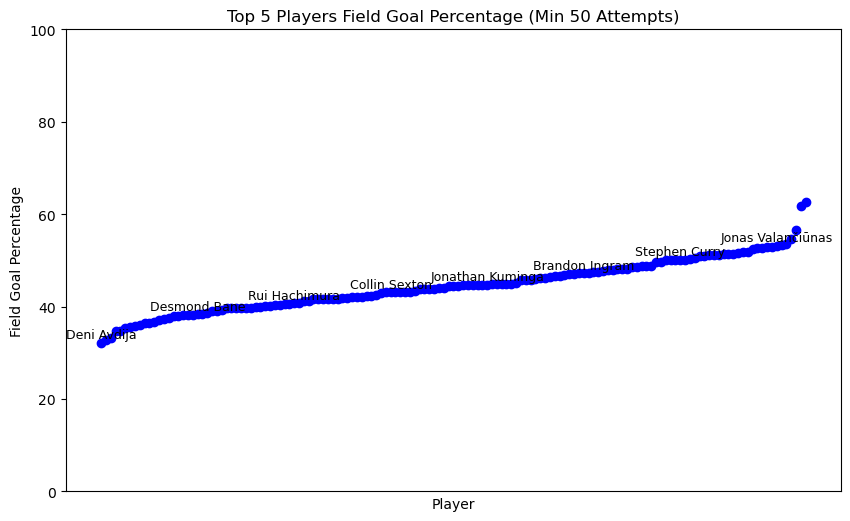

Index([325, 372, 324, 434, 212], dtype='int64')


In [24]:
top_paint_players = df[df['Paint_FGA'] >= 100].sort_values(by='Paint_FG%', ascending=True)
top_paint_players
# Create a line graph
plt.figure(figsize=(10, 6))
plt.scatter(top_paint_players['Player'], top_paint_players['Paint_FG%'], color='blue', marker='o')

top_5_indices = top_paint_players.index[-5:]

for i in range(len(top_paint_players)):
    if i % 20 == 0 or i in top_5_indices:
        plt.text(top_paint_players['Player'].iloc[i], 
                 top_paint_players['Paint_FG%'].iloc[i] + 1,  # Adjust vertical position
                 top_paint_players['Player'].iloc[i], 
                 ha='center', 
                 fontsize=9)
# for i in range(len(top_paint_players.tail(5))):
#     plt.text(top_paint_players['Player'].iloc[i], 
#                  top_paint_players['Paint_FG%'].iloc[i] + 1,  # Adjust vertical position
#                  top_paint_players['Player'].iloc[i], 
#                  ha='center', 
#                  fontsize=9)


plt.ylim(0, 100)
plt.xticks([])
plt.title('Top 5 Players Field Goal Percentage (Min 50 Attempts)')
plt.xlabel('Player')
plt.ylabel('Field Goal Percentage')
#plt.tight_layout()
plt.show()
print(top_5_indices)

In [25]:
df[df['Above_Break_3_FGA'] >= 100].sort_values(by='Above_Break_3_FGM', ascending=False).head(20)

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
509,Stephen Curry,GSW,36,108,169,63.9,109,217,50.2,76,...,52.4,20,36,55.6,42,78,53.8,315,796,39.6
372,Luka Dončić,DAL,25,202,266,75.9,185,338,54.7,133,...,26.7,3,11,27.3,7,26,26.9,277,713,38.8
348,Klay Thompson,GSW,34,70,93,75.3,49,119,41.2,103,...,30.4,23,46,50.0,37,92,40.2,231,597,38.7
268,Jayson Tatum,BOS,26,283,398,71.1,68,182,37.4,92,...,31.8,7,20,35.0,14,42,33.3,215,567,37.9
109,Damian Lillard,MIL,33,189,315,60.0,59,161,36.6,73,...,23.8,6,16,37.5,11,37,29.7,209,578,36.2
64,CJ McCollum,NOP,32,82,151,54.3,105,218,48.2,58,...,42.3,20,42,47.6,31,68,45.6,208,489,42.5
462,Paul George,LAC,34,134,200,67.0,75,161,46.6,130,...,53.8,19,53,35.8,40,92,43.5,203,495,41.0
174,Fred VanVleet,HOU,30,62,128,48.4,53,127,41.7,81,...,53.6,12,27,44.4,27,55,49.1,200,523,38.2
100,D'Angelo Russell,LAL,28,123,177,69.5,90,224,40.2,53,...,39.1,10,27,37.0,28,73,38.4,198,467,42.4
153,Donte DiVincenzo,NYK,27,110,190,57.9,40,85,47.1,12,...,41.5,42,81,51.9,86,187,46.0,196,515,38.1


In [26]:
df

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
0,A.J. Lawson,DAL,23,38,53,71.7,1,15,6.7,2,...,23.5,4,15,26.7,8,32,25.0,5,18,27.8
1,AJ Green,MIL,24,6,7,85.7,0,4,0.0,8,...,50.0,6,15,40.0,18,39,46.2,51,130,39.2
2,AJ Griffin,ATL,20,3,5,60.0,3,12,25.0,2,...,16.7,1,3,33.3,2,9,22.2,8,30,26.7
3,Aaron Gordon,DEN,28,328,463,70.8,19,78,24.4,11,...,24.1,13,27,48.1,20,56,35.7,20,81,24.7
4,Aaron Holiday,HOU,27,46,71,64.8,33,84,39.3,23,...,38.9,16,31,51.6,23,49,46.9,61,167,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,CHI,29,69,115,60.0,12,29,41.4,30,...,52.9,5,14,35.7,14,31,45.2,45,138,32.6
568,Zavier Simpson,DET,27,6,14,42.9,3,16,18.8,3,...,0.0,0,1,0.0,0,2,0.0,5,15,33.3
569,Zeke Nnaji,DEN,23,58,106,54.7,5,15,33.3,0,...,0.0,2,6,33.3,2,9,22.2,4,14,28.6
570,Ziaire Williams,MEM,22,66,99,66.7,11,46,23.9,15,...,27.8,17,41,41.5,27,77,35.1,31,110,28.2


In [27]:
#Let's save the file as a CSV... We might have to come back in and clean the data more if necessary

In [28]:
df.to_csv(r'C:\Users\Owen\Documents\Personal Projects\NBA Shot Chart\shot_chart_v1.csv')

I want to fix some of the names, specifically those holding special characters such as "Nikola Jokić"

In [30]:
df[df['Player'].str.contains(r'[^\x00-\x7F]', regex=True)]

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
43,Boban Marjanović,HOU,35,13,16,81.3,4,12,33.3,1,...,0.0,0,0,0.0,0,0,0.0,0,2,0.0
45,Bogdan Bogdanović,ATL,31,95,177,53.7,86,177,48.6,50,...,38.9,30,72,41.7,58,144,40.3,182,493,36.9
46,Bojan Bogdanović,NYK,35,67,114,58.8,57,115,49.6,52,...,37.8,25,55,45.5,42,100,42.0,91,234,38.9
114,Danté Exum,DAL,28,82,124,66.1,22,59,37.3,4,...,40.0,11,22,50.0,21,47,44.7,32,59,54.2
116,Dario Šarić,GSW,30,65,87,74.7,33,80,41.3,9,...,33.3,1,10,10.0,6,25,24.0,68,172,39.5
136,Dennis Schröder,BKN,30,133,231,57.6,59,162,36.4,73,...,34.2,13,27,48.1,26,65,40.0,112,298,37.6
232,Jakob Pöltl,TOR,28,175,233,75.1,65,130,50.0,8,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
288,Jonas Valančiūnas,NOP,32,208,297,70.0,103,194,53.1,54,...,16.7,2,12,16.7,4,24,16.7,33,96,34.4
320,Jusuf Nurkić,PHX,29,229,383,59.8,64,140,45.7,5,...,16.7,0,3,0.0,1,9,11.1,21,81,25.9
354,Kristaps Porziņģis,BOS,28,157,213,73.7,89,174,51.1,32,...,50.0,0,6,0.0,1,8,12.5,109,283,38.5


In [31]:
# df['Player'].replace({'ć': 'c', 'é': 'e'}, inplace=True)


replacements = {
    'ć': 'c',
    'č': 'c',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ö': 'o',
    'ñ': 'n',
    'á': 'a',
    'à': 'a',
    'ü': 'u',
    'ć': 'c',
    'Š': 'S',
    'ū': 'u',
    'ģ': 'g',
    'ã': 'a',
    'ņ': 'n'
    # Add more as needed
}

df['Player'] = df['Player'].replace(replacements, regex=True)

In [32]:
# Now Check Again:
df[df['Player'].str.contains(r'[^\x00-\x7F]', regex=True)]

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%


Now, all of the names are fixed!

In [34]:
df[df['Player'] == 'Stephen Curry']

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
509,Stephen Curry,GSW,36,108,169,63.9,109,217,50.2,76,...,52.4,20,36,55.6,42,78,53.8,315,796,39.6


Coming back here later. I want to lengthen my data in order to give each zone an associated X and Y coordinate AND have FG M,A, and % columns for each player. I will use pd.melt. This will make it so every player will have 6 rows each, but in Tableau, where this end visualization is being made, the filter for player names do it by distinct value, so nothing will have to change on that front.

I will do this with FGM first, then FGA, and finally FG%. I will concatenate them all when they are all individually made in order to make the melt process easier.

In [35]:
my_nba = df
my_nba

,Player,Team,Age,Rest_Area_FGM,Rest_Area_FGA,Rest_Area_FG%,Paint_FGM,Paint_FGA,Paint_FG%,Mid_FGM,...,L_Corner_3_FG%,R_Corner_3_FGM,R_Corner_3_FGA,R_Corner_3_FG%,Total_Corner_3_FGM,Total_Corner_3_FGA,Total_Corner_3_FG%,Above_Break_3_FGM,Above_Break_3_FGA,Above_Break_3_FG%
0,A.J. Lawson,DAL,23,38,53,71.7,1,15,6.7,2,...,23.5,4,15,26.7,8,32,25.0,5,18,27.8
1,AJ Green,MIL,24,6,7,85.7,0,4,0.0,8,...,50.0,6,15,40.0,18,39,46.2,51,130,39.2
2,AJ Griffin,ATL,20,3,5,60.0,3,12,25.0,2,...,16.7,1,3,33.3,2,9,22.2,8,30,26.7
3,Aaron Gordon,DEN,28,328,463,70.8,19,78,24.4,11,...,24.1,13,27,48.1,20,56,35.7,20,81,24.7
4,Aaron Holiday,HOU,27,46,71,64.8,33,84,39.3,23,...,38.9,16,31,51.6,23,49,46.9,61,167,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,CHI,29,69,115,60.0,12,29,41.4,30,...,52.9,5,14,35.7,14,31,45.2,45,138,32.6
568,Zavier Simpson,DET,27,6,14,42.9,3,16,18.8,3,...,0.0,0,1,0.0,0,2,0.0,5,15,33.3
569,Zeke Nnaji,DEN,23,58,106,54.7,5,15,33.3,0,...,0.0,2,6,33.3,2,9,22.2,4,14,28.6
570,Ziaire Williams,MEM,22,66,99,66.7,11,46,23.9,15,...,27.8,17,41,41.5,27,77,35.1,31,110,28.2


In [36]:
FGM = pd.melt(my_nba, id_vars=['Player', 'Age', 'Team'], value_vars=['Rest_Area_FGM', 'Paint_FGM', 'Mid_FGM', 'L_Corner_3_FGM', 'R_Corner_3_FGM', 'Above_Break_3_FGM'])

In [37]:
my_nba.columns

Index(['Player', 'Team', 'Age', 'Rest_Area_FGM', 'Rest_Area_FGA',
       'Rest_Area_FG%', 'Paint_FGM', 'Paint_FGA', 'Paint_FG%', 'Mid_FGM',
       'Mid_FGA', 'Mid_FG%', 'L_Corner_3_FGM', 'L_Corner_3_FGA',
       'L_Corner_3_FG%', 'R_Corner_3_FGM', 'R_Corner_3_FGA', 'R_Corner_3_FG%',
       'Total_Corner_3_FGM', 'Total_Corner_3_FGA', 'Total_Corner_3_FG%',
       'Above_Break_3_FGM', 'Above_Break_3_FGA', 'Above_Break_3_FG%'],
      dtype='object')

In [38]:
FGM

,Player,Age,Team,variable,value
0,A.J. Lawson,23,DAL,Rest_Area_FGM,38
1,AJ Green,24,MIL,Rest_Area_FGM,6
2,AJ Griffin,20,ATL,Rest_Area_FGM,3
3,Aaron Gordon,28,DEN,Rest_Area_FGM,328
4,Aaron Holiday,27,HOU,Rest_Area_FGM,46
...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above_Break_3_FGM,45
3368,Zavier Simpson,27,DET,Above_Break_3_FGM,5
3369,Zeke Nnaji,23,DEN,Above_Break_3_FGM,4
3370,Ziaire Williams,22,MEM,Above_Break_3_FGM,31


Now, I want to change my column values.

In [125]:
FGM.rename(columns = {'variable': 'Shot Type', 'value': 'FGM' }, inplace=True)
FGM

,Player,Age,Team,Shot Type,FGM,X Coordinate,Y Coordinate
0,A.J. Lawson,23,DAL,Restricted Area,38,0,0
1,AJ Green,24,MIL,Restricted Area,6,0,0
2,AJ Griffin,20,ATL,Restricted Area,3,0,0
3,Aaron Gordon,28,DEN,Restricted Area,328,0,0
4,Aaron Holiday,27,HOU,Restricted Area,46,0,0
...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,45,-10,250
3368,Zavier Simpson,27,DET,Above Break,5,-10,250
3369,Zeke Nnaji,23,DEN,Above Break,4,-10,250
3370,Ziaire Williams,22,MEM,Above Break,31,-10,250


I also want to change the row values of the "Shot Type" column to be more readable. This is easily done with .replace.

'Paint_FGM', 'Mid_FGM', 'L_Corner_3_FGM', 'R_Corner_3_FGM', 'Above_Break_3_FGM'

In [41]:
FGM['Shot Type'].replace({'Rest_Area_FGM': 'Restricted Area', 'Paint_FGM': 'Paint (-Rest)', 'Mid_FGM': 'Mid Range', 'L_Corner_3_FGM': 'Left Corner',
                         'R_Corner_3_FGM': 'Right Corner', 'Above_Break_3_FGM': 'Above Break'}, inplace=True)

C:\Users\Owen\AppData\Local\Temp\ipykernel_35128\3113742545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FGM['Shot Type'].replace({'Rest_Area_FGM': 'Restricted Area', 'Paint_FGM': 'Paint (-Rest)', 'Mid_FGM': 'Mid Range', 'L_Corner_3_FGM': 'Left Corner',


In [42]:
FGM['Shot Type'].value_counts()

Shot Type
Restricted Area    562
Paint (-Rest)      562
Mid Range          562
Left Corner        562
Right Corner       562
Above Break        562
Name: count, dtype: int64

In [43]:
FGM[FGM['Player'].str.contains('Nikola Jokic')]

,Player,Age,Team,Shot Type,FGM
426,Nikola Jokic,29,DEN,Restricted Area,335
988,Nikola Jokic,29,DEN,Paint (-Rest),330
1550,Nikola Jokic,29,DEN,Mid Range,74
2112,Nikola Jokic,29,DEN,Left Corner,2
2674,Nikola Jokic,29,DEN,Right Corner,0
3236,Nikola Jokic,29,DEN,Above Break,81


In [44]:
FGM

,Player,Age,Team,Shot Type,FGM
0,A.J. Lawson,23,DAL,Restricted Area,38
1,AJ Green,24,MIL,Restricted Area,6
2,AJ Griffin,20,ATL,Restricted Area,3
3,Aaron Gordon,28,DEN,Restricted Area,328
4,Aaron Holiday,27,HOU,Restricted Area,46
...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,45
3368,Zavier Simpson,27,DET,Above Break,5
3369,Zeke Nnaji,23,DEN,Above Break,4
3370,Ziaire Williams,22,MEM,Above Break,31


In [45]:
FGM['Shot Type'].value_counts()

Shot Type
Restricted Area    562
Paint (-Rest)      562
Mid Range          562
Left Corner        562
Right Corner       562
Above Break        562
Name: count, dtype: int64

FLOAT(IF [Zone] = 'Above Break 3 FGM' THEN -10
ELSEIF [Zone] = 'L Corner 3 FGM' THEN -235
ELSEIF [Zone] = 'R Corner 3 FGM' THEN 235
ELSEIF [Zone] = 'Rest Area FGM' THEN 0
ELSEIF [Zone] = 'Paint FGM' THEN -10
ELSEIF [Zone] = 'Mid FGM' THEN 10

Y's
FLOAT(IF [Zone] = 'Above Break 3 FGM' THEN 250
ELSEIF [Zone] = 'R Corner 3 FGM' THEN 0
ELSEIF [Zone] = 'L Corner 3 FGM' THEN 0
ELSEIF [Zone] = 'Rest Area FGM' THEN 0
ELSEIF [Zone] = 'Paint FGM' THEN 50
ELSEIF [Zone] = 'Mid FGM' THEN 100
END)

These are the values I want for my map. The image I am using is of a specific size, and these measurements are where each zone's clickable spot will be. I can add this in Tableau, but it would be easier just to do it now with pd.map.

In [47]:
x_coord_mapping = {
    'Restricted Area': 0,
    'Paint (-Rest)': -10,
    'Mid Range': 10,
    'Left Corner': -235,
    'Right Corner': 235,
    'Above Break': -10
    # Add other shot types if needed
}

y_coord_mapping = {
    'Restricted Area': 0,
    'Paint (-Rest)': 50,
    'Mid Range': 100,
    'Left Corner': 0,
    'Right Corner': 0,
    'Above Break': 250
    # Add other shot types if needed
}

FGM['X Coordinate'] = FGM['Shot Type'].map(x_coord_mapping)
FGM['Y Coordinate'] = FGM['Shot Type'].map(y_coord_mapping)

In [48]:
FGM

,Player,Age,Team,Shot Type,FGM,X Coordinate,Y Coordinate
0,A.J. Lawson,23,DAL,Restricted Area,38,0,0
1,AJ Green,24,MIL,Restricted Area,6,0,0
2,AJ Griffin,20,ATL,Restricted Area,3,0,0
3,Aaron Gordon,28,DEN,Restricted Area,328,0,0
4,Aaron Holiday,27,HOU,Restricted Area,46,0,0
...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,45,-10,250
3368,Zavier Simpson,27,DET,Above Break,5,-10,250
3369,Zeke Nnaji,23,DEN,Above Break,4,-10,250
3370,Ziaire Williams,22,MEM,Above Break,31,-10,250


In [99]:
FGM.to_csv(r'C:\Users\Owen\Documents\Personal Projects\NBA Shot Chart\FGM.csv')

In [50]:
FGM[FGM['Player'] == 'Stephen Curry']

,Player,Age,Team,Shot Type,FGM,X Coordinate,Y Coordinate
499,Stephen Curry,36,GSW,Restricted Area,108,0,0
1061,Stephen Curry,36,GSW,Paint (-Rest),109,-10,50
1623,Stephen Curry,36,GSW,Mid Range,76,10,100
2185,Stephen Curry,36,GSW,Left Corner,22,-235,0
2747,Stephen Curry,36,GSW,Right Corner,20,235,0
3309,Stephen Curry,36,GSW,Above Break,315,-10,250


Now, we just copy the code for creating FGM for a FGA and FG% dataframe. I will just copy the code from above and replace the relevant values.

In [127]:
FGA = pd.melt(my_nba, id_vars=['Player', 'Age', 'Team'], value_vars=['Rest_Area_FGA', 'Paint_FGA', 'Mid_FGA', 'L_Corner_3_FGA', 'R_Corner_3_FGA', 'Above_Break_3_FGA'],
                   var_name = 'Shot Type', value_name = 'FGA')
FGA['Shot Type'].replace({'Rest_Area_FGA': 'Restricted Area', 'Paint_FGA': 'Paint (-Rest)', 'Mid_FGA': 'Mid Range', 'L_Corner_3_FGA': 'Left Corner',
                         'R_Corner_3_FGA': 'Right Corner', 'Above_Break_3_FGA': 'Above Break'}, inplace=True)

x_coord_mapping = {
    'Restricted Area': 0,
    'Paint (-Rest)': -10,
    'Mid Range': 10,
    'Left Corner': -235,
    'Right Corner': 235,
    'Above Break': -10
    # Add other shot types if needed
}

y_coord_mapping = {
    'Restricted Area': 0,
    'Paint (-Rest)': 50,
    'Mid Range': 100,
    'Left Corner': 0,
    'Right Corner': 0,
    'Above Break': 250
    # Add other shot types if needed
}

FGA['X Coordinate'] = FGA['Shot Type'].map(x_coord_mapping)
FGA['Y Coordinate'] = FGA['Shot Type'].map(y_coord_mapping)

FGA

C:\Users\Owen\AppData\Local\Temp\ipykernel_35128\3234007531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FGA['Shot Type'].replace({'Rest_Area_FGA': 'Restricted Area', 'Paint_FGA': 'Paint (-Rest)', 'Mid_FGA': 'Mid Range', 'L_Corner_3_FGA': 'Left Corner',


,Player,Age,Team,Shot Type,FGA,X Coordinate,Y Coordinate
0,A.J. Lawson,23,DAL,Restricted Area,53,0,0
1,AJ Green,24,MIL,Restricted Area,7,0,0
2,AJ Griffin,20,ATL,Restricted Area,5,0,0
3,Aaron Gordon,28,DEN,Restricted Area,463,0,0
4,Aaron Holiday,27,HOU,Restricted Area,71,0,0
...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,138,-10,250
3368,Zavier Simpson,27,DET,Above Break,15,-10,250
3369,Zeke Nnaji,23,DEN,Above Break,14,-10,250
3370,Ziaire Williams,22,MEM,Above Break,110,-10,250


Let's ensure their shapes are equal.

In [133]:
FGM.shape == FGA.shape

True

In [135]:
FG_Percentage = pd.melt(my_nba, id_vars=['Player', 'Age', 'Team'], value_vars=['Rest_Area_FG%', 'Paint_FG%', 'Mid_FG%', 'L_Corner_3_FG%', 'R_Corner_3_FG%', 'Above_Break_3_FG%'],
                   var_name = 'Shot Type', value_name = 'FG%')
FG_Percentage['Shot Type'].replace({'Rest_Area_FG%': 'Restricted Area', 'Paint_FG%': 'Paint (-Rest)', 'Mid_FG%': 'Mid Range', 'L_Corner_3_FG%': 'Left Corner',
                         'R_Corner_3_FG%': 'Right Corner', 'Above_Break_3_FG%': 'Above Break'}, inplace=True)

x_coord_mapping = {
    'Restricted Area': 0,
    'Paint (-Rest)': -10,
    'Mid Range': 10,
    'Left Corner': -235,
    'Right Corner': 235,
    'Above Break': -10
    # Add other shot types if needed
}

y_coord_mapping = {
    'Restricted Area': 0,
    'Paint (-Rest)': 50,
    'Mid Range': 100,
    'Left Corner': 0,
    'Right Corner': 0,
    'Above Break': 250
    # Add other shot types if needed
}

FG_Percentage['X Coordinate'] = FG_Percentage['Shot Type'].map(x_coord_mapping)
FG_Percentage['Y Coordinate'] = FG_Percentage['Shot Type'].map(y_coord_mapping)

FG_Percentage

C:\Users\Owen\AppData\Local\Temp\ipykernel_35128\559829364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FG_Percentage['Shot Type'].replace({'Rest_Area_FG%': 'Restricted Area', 'Paint_FG%': 'Paint (-Rest)', 'Mid_FG%': 'Mid Range', 'L_Corner_3_FG%': 'Left Corner',


,Player,Age,Team,Shot Type,FG%,X Coordinate,Y Coordinate
0,A.J. Lawson,23,DAL,Restricted Area,71.7,0,0
1,AJ Green,24,MIL,Restricted Area,85.7,0,0
2,AJ Griffin,20,ATL,Restricted Area,60.0,0,0
3,Aaron Gordon,28,DEN,Restricted Area,70.8,0,0
4,Aaron Holiday,27,HOU,Restricted Area,64.8,0,0
...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,32.6,-10,250
3368,Zavier Simpson,27,DET,Above Break,33.3,-10,250
3369,Zeke Nnaji,23,DEN,Above Break,28.6,-10,250
3370,Ziaire Williams,22,MEM,Above Break,28.2,-10,250


We can check all of them against each other now to ensure the merge will go smoothly. They should have all the same shape and all the same column names with the exception of FGM, FGA, and FG%. Those will become their own columns in the new merged dataframe.

In [139]:
print(f"FGM Shape: {FGM.shape}")
print(f"FGA Shape: {FGA.shape}")
print(f"FG% Shape: {FG_Percentage.shape}")

print(f"FGM Columns: {FGM.columns}")
print(f"FGA Columns: {FGA.columns}")
print(f"FG% Columns: {FG_Percentage.columns}")

FGM Shape: (3372, 7)
FGA Shape: (3372, 7)
FG% Shape: (3372, 7)
FGM Columns: Index(['Player', 'Age', 'Team', 'Shot Type', 'FGM', 'X Coordinate',
       'Y Coordinate'],
      dtype='object')
FGA Columns: Index(['Player', 'Age', 'Team', 'Shot Type', 'FGA', 'X Coordinate',
       'Y Coordinate'],
      dtype='object')
FG% Columns: Index(['Player', 'Age', 'Team', 'Shot Type', 'FG%', 'X Coordinate',
       'Y Coordinate'],
      dtype='object')


Everything looks in order, let's join our three dataframes now. We will use two separate joins to get everything together, and then order our columns a bit better.

In [152]:
first_merge = FGM.merge(FGA, on=['Player', 'Age', 'Team', 'Shot Type', 'X Coordinate', 'Y Coordinate'])
first_merge

,Player,Age,Team,Shot Type,FGM,X Coordinate,Y Coordinate,FGA
0,A.J. Lawson,23,DAL,Restricted Area,38,0,0,53
1,AJ Green,24,MIL,Restricted Area,6,0,0,7
2,AJ Griffin,20,ATL,Restricted Area,3,0,0,5
3,Aaron Gordon,28,DEN,Restricted Area,328,0,0,463
4,Aaron Holiday,27,HOU,Restricted Area,46,0,0,71
...,...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,45,-10,250,138
3368,Zavier Simpson,27,DET,Above Break,5,-10,250,15
3369,Zeke Nnaji,23,DEN,Above Break,4,-10,250,14
3370,Ziaire Williams,22,MEM,Above Break,31,-10,250,110


In [154]:
second_merge = first_merge.merge(FG_Percentage, on=['Player', 'Age', 'Team', 'Shot Type', 'X Coordinate', 'Y Coordinate'])
second_merge

,Player,Age,Team,Shot Type,FGM,X Coordinate,Y Coordinate,FGA,FG%
0,A.J. Lawson,23,DAL,Restricted Area,38,0,0,53,71.7
1,AJ Green,24,MIL,Restricted Area,6,0,0,7,85.7
2,AJ Griffin,20,ATL,Restricted Area,3,0,0,5,60.0
3,Aaron Gordon,28,DEN,Restricted Area,328,0,0,463,70.8
4,Aaron Holiday,27,HOU,Restricted Area,46,0,0,71,64.8
...,...,...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,45,-10,250,138,32.6
3368,Zavier Simpson,27,DET,Above Break,5,-10,250,15,33.3
3369,Zeke Nnaji,23,DEN,Above Break,4,-10,250,14,28.6
3370,Ziaire Williams,22,MEM,Above Break,31,-10,250,110,28.2


In [158]:
order = ['Player', 'Age', 'Team', 'Shot Type', 'FGM', 'FGA', 'FG%', 'X Coordinate', 'Y Coordinate']

# Reorder the DataFrame columns
all_shots = second_merge[order]
all_shots

,Player,Age,Team,Shot Type,FGM,FGA,FG%,X Coordinate,Y Coordinate
0,A.J. Lawson,23,DAL,Restricted Area,38,53,71.7,0,0
1,AJ Green,24,MIL,Restricted Area,6,7,85.7,0,0
2,AJ Griffin,20,ATL,Restricted Area,3,5,60.0,0,0
3,Aaron Gordon,28,DEN,Restricted Area,328,463,70.8,0,0
4,Aaron Holiday,27,HOU,Restricted Area,46,71,64.8,0,0
...,...,...,...,...,...,...,...,...,...
3367,Zach LaVine,29,CHI,Above Break,45,138,32.6,-10,250
3368,Zavier Simpson,27,DET,Above Break,5,15,33.3,-10,250
3369,Zeke Nnaji,23,DEN,Above Break,4,14,28.6,-10,250
3370,Ziaire Williams,22,MEM,Above Break,31,110,28.2,-10,250


Now we create a text file out of this which we can upload into Tableau:

In [160]:
all_shots.to_csv(r'C:\Users\Owen\Documents\Personal Projects\NBA Shot Chart\all_shots.csv')